In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the 4 datastet 

cpu1k = pd.read_csv('cpu-1200.csv')
cpu12k = pd.read_csv('cpu-12000.csv')
gpu1k = pd.read_csv('gpu-1200.csv')
gpu12k = pd.read_csv('gpu-12000.csv')

In [3]:
# function to aggregate values
def pre_process(data, gpu=False):
    groupped_data = data.groupby(["size", "what"])
    
    result = groupped_data.agg(average_time=('time', 'mean'),
                               sd=('time', 'std'),
                               min_time=('time', 'min'),
                               max_time=('time', 'max')
                               ).reset_index()
    # gpu have 4 MPI processes per node
    if gpu:
        result['size'] = result['size'] / 4
    return result
    
cpu_1k = pre_process(cpu1k)
cpu_12k = pre_process(cpu12k)
gpu_1k = pre_process(gpu1k, gpu=True)
gpu_12k = pre_process(gpu12k, gpu=True)

In [4]:
gpu_1k

,size,what,average_time,sd,min_time,max_time
0,1.0,computation,0.007907,0.000068,0.007825,0.008028
1,1.0,matrix-initialization,0.002318,0.000499,0.001708,0.003100
2,1.0,mpi-send-rec,0.007024,0.003626,0.002722,0.011384
3,2.0,computation,0.003968,0.000050,0.003901,0.004060
4,2.0,matrix-initialization,0.001132,0.000298,0.000860,0.001636
5,2.0,mpi-send-rec,0.032029,0.003430,0.025777,0.036610
6,4.0,computation,0.001982,0.000048,0.001943,0.002088
7,4.0,matrix-initialization,0.001345,0.000495,0.000431,0.002051
8,4.0,mpi-send-rec,0.048539,0.005138,0.037140,0.051955
9,8.0,computation,0.000992,0.000020,0.000953,0.001037


# Plot the results

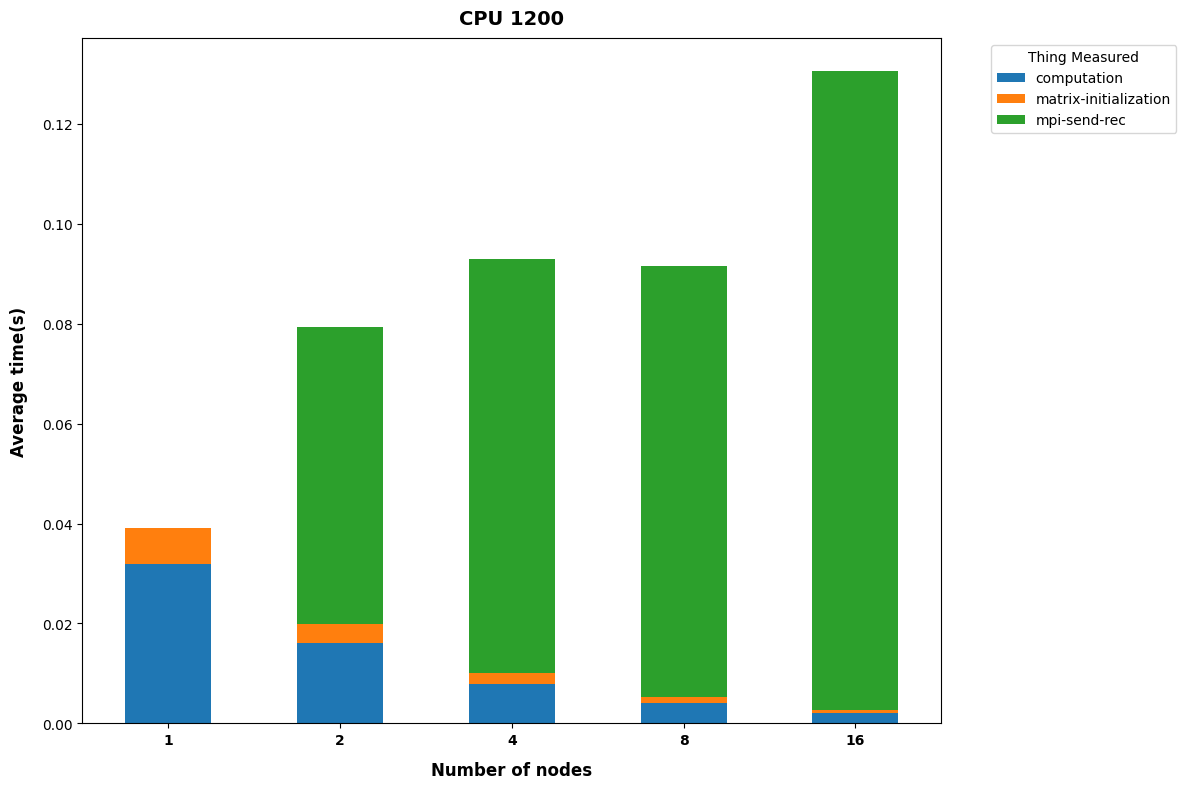

In [5]:
def plot_single_stack(data, title, ylim=None):
    extracted = data[["size", "what", "average_time"]]
    extracted.reset_index(drop=True, inplace=True)
    # pivot the table to perform the stacked bar plot
    pivot_df = extracted.pivot(index='size', columns='what', values='average_time')
    # plotting 
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
    ax.set_ylabel('Average time(s)', fontsize=12, fontweight='bold', labelpad=10)
    ax.set_xlabel('Number of nodes', fontsize=12, fontweight='bold', labelpad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.xticks(fontsize=10, fontweight='bold')
    if ylim:                    # for some plot auto scale crop the first column
        ax.set_ylim(ylim)
    ax.set_title(title, fontsize=14, fontweight='bold', pad=10)
    plt.legend(title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
plot_single_stack(cpu_1k, 'CPU 1200')

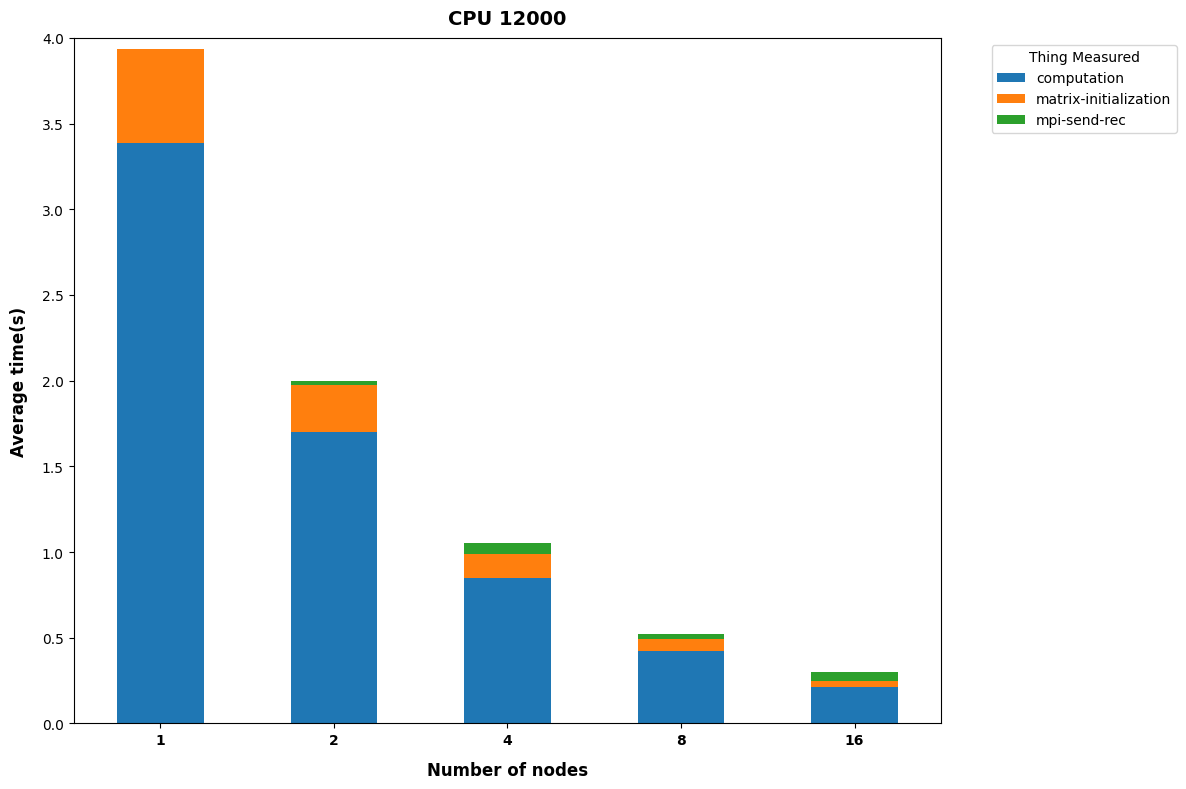

In [6]:
plot_single_stack(cpu_12k, 'CPU 12000', ylim=(0, 4))

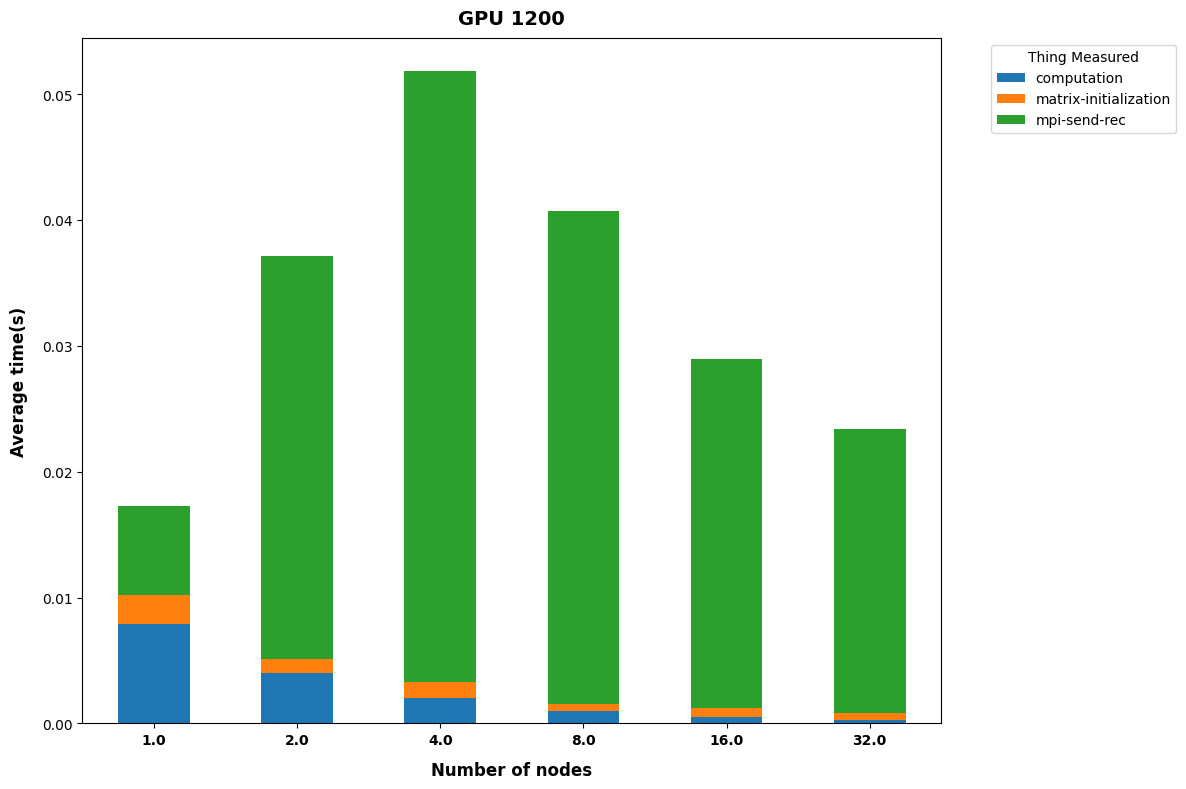

In [7]:
plot_single_stack(gpu_1k, 'GPU 1200')

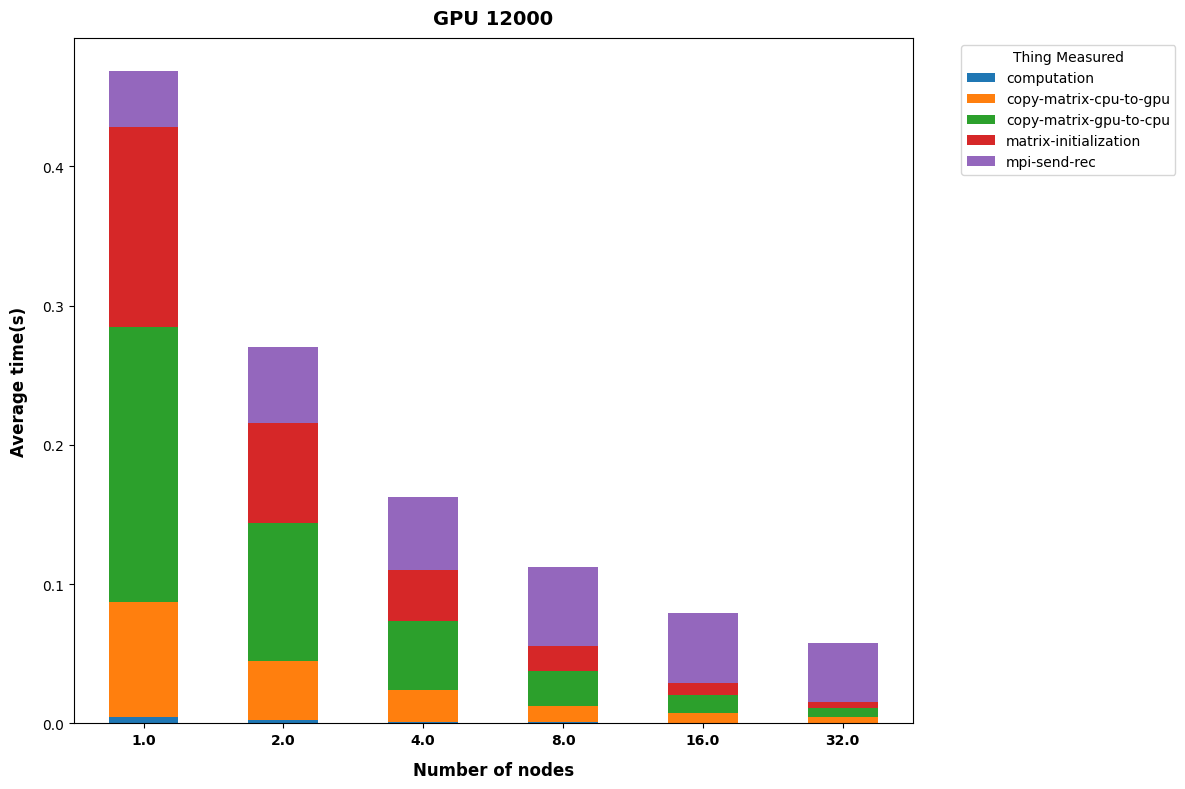

In [8]:
plot_single_stack(gpu_12k, 'GPU 12000')